## Gradient Descent

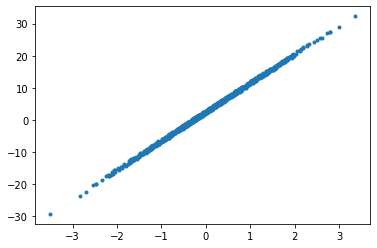

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
X = np.random.randn(samples, 1)
noise= np.random.rand(samples, 1)
y = 2+ 9*X + noise

plt.plot(X,y, '.')

In [5]:
X = np.c_[np.ones(samples), X]
X[:5]

array([[ 1.        , -1.17652191],
       [ 1.        ,  2.5600725 ],
       [ 1.        , -0.81964424],
       [ 1.        ,  1.50002826],
       [ 1.        , -1.65639362]])

## Train / Test / Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [7]:
def gradient_descent(X,y, learning_rate = .1, iterations =100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)
   
    for _ in range(iterations):
        gradient = 2 / m * X.T@(X @ theta - y)
        theta -= learning_rate*gradient
    theta = gradient_descent(X_train,y_train)
    theta.reshape(-1)


In [8]:
epochs = range(1,200)
thetas = np.array([gradient_descent(X_train, y_train, iterations= epoch).reshape(-1) for epoch in epochs])
thetas.shape

In [3]:
fig, ax = plt.figure(dpi=80), plt.axes()
ax.plot(epochs, thetas)

NameError: name 'plt' is not defined

## Stochastic gradient descent (SGD)

In [1]:
epochs = 10
t0, t1 = 5,10 # learning schedule parameters

def learning_rate_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)- y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients

NameError: name 'np' is not defined